# 梯度下降


### 伪代码：

- bgd
> 优化代价函数是所有关于数据样本的loss，计算整个样本的loss后才更新权值，m为所有样本数量和

    初始权值，迭代次数,单次误差，总误差数组，每一次迭代权值矩阵
    收敛flag：converged
    while 迭代中
        if flag: 结束
        for 每一个权值，
            梯度下降公式，计算每一个下降梯度
        更新$\theta_j$
        计算损失函数J
        if 误差小于精度：
            flag为真
    返回
  
- sgd
> 优化的代价函数是单个数据样本的loss，计算每个样本的loss后就可以立即更新权值，即m=1

    初始权值，迭代次数,单次误差，总误差数组，每一次迭代权值矩阵
    收敛flag：converged
    while 迭代中
        if flag: 结束
        for 每一个权值，
            梯度下降公式，计算$\theta_j$
        计算损失函数J
        if 误差小于精度：
            flag为真
    返回
            

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.ticker as mtick
import time

In [80]:


def exe_time(func):
    """ 耗时计算装饰器 
    """
    def new_func(*args, **args2):
        t0 = time.time()
        back = func(*args, **args2)
        return back, time.time() - t0
    return new_func

def load_dataset(filename):
    """ 读取数据
    数据格式如下：
    “f1 tab f2 tab f3 tab label"
    
    Args:
        filename
    Returns:
        X: 训练样本集矩阵
        y: 标签集矩阵
    """
    feature_number = len(open(filename).readline().split('\t'))-1   #特征数目 = 总行数 - 1
    X = []
    y = []
    file = open(filename)
    for line in file.readlines():   #注意是readlines
        feature_list = []
        current_line = line.strip().split('\t')
        for i in range(feature_number):
            feature_list.append(float(current_line[i]))
        X.append(feature_list)
        y.append(float(current_line[-1]))
    return np.mat(X), np.mat(y).T

X, y = load_dataset('data/ex1.txt')
X.shape

(97, 1)

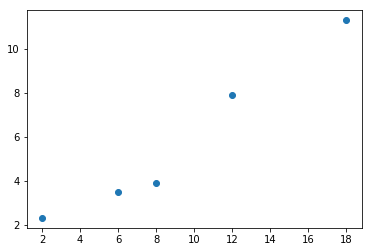

In [81]:
# 创建数据
X = np.array([[1, 2], [1, 6], [1, 8], [1,12], [1,18]])
y = np.array([[2.3],[3.5],[3.9],[7.9],[11.3]])
m, n = X.shape
theta_ground = np.array([[1],[1]])

plt.figure()
plt.plot(X[:,1],y,'o')
plt.show()

In [82]:
def h(theta, x):
    """预测函数
    
    Args:
        theta: 相关系数矩阵
        x: 特征矩阵
   Return:
       预测结果
    """
    return (x @ theta)

def J(theta, X, y):
    """代价函数
    
    Args:
        theta: 相关系数矩阵
        X: 样本集矩阵
        y: 标签集矩阵
        
    Return:
        预测误差
    """
    m = X.shape[0]
    return (X @ theta - y).T @ (X @ theta - y) / (2*m)

In [83]:
@exe_time
def bgd(X, y, learning_rate = 0.01, max_loop = 1000, epsilon = 0.001):
    """批量梯度下降
    
    Args:
        rate: 学习率
        max_loop： 最大迭代次数
        epsilon： 收敛精度
    Return:
        (theta, errors, thetas), time_consumed
    """
    m, n = X.shape  #m 为样本数，  n为特征数
    theta = np.zeros((n, 1))
    thetas = []
    error = float('inf')
    errors = []
    counts = 0   
    while counts < max_loop and error > epsilon:
        counts += 1
        tmp = np.zeros((n,1))
        for j in range(n):
            deriv = (X@theta - y).T @ X[:,j] / m
            tmp[j] = theta[j] - learning_rate * deriv
        theta = tmp
        thetas.append(theta.tolist())        
        error = J(theta, X, y) 
        errors.append(error.tolist())
    return theta, thetas, errors

In [84]:
#暂时不清楚问题原因

@exe_time
def sgd(X, y, learning_rate=0.01, max_loop=1000, epsilon=0.001):
    """随机梯度下降
    """
    m, n = X.shape
    theta = np.zeros((n,1))
    thetas = []
    error = float('inf')
    errors = []
    count = 0 
    converged = False
    while count < max_loop:
        if converged:
            break
        count += 1
        for i in range(m):
            if converged:
                break
            diff = h(theta, X[i].T) - y[i]
            tmp = np.zeros((n,1))
            for j in range(n):
                tmp[j] = theta[j] - learning_rate * diff * X[i,j]
            theta = tmp
            thetas.append(theta.tolist())
            error = J(theta, X, y)
            errors.append(error.tolist())
            if error < epsilon:
                converged = True
    return theta, thetas, errors
    

# 测试

In [85]:
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import numpy as np

learning_rate = 0.01
max_loop =1000
epsilon = 0.001

result, time_consumed = bgd(X, y, learning_rate, max_loop, epsilon)
theta, thetas, errors = result

In [86]:

#training_set
yi

NameError: name 'yi' is not defined

In [92]:
file_name = 'data/ex1.txt'
X, y = load_dataset(file_name)
m, n = X.shape    #m: examples number; n: featuer numbers

X = np.concatenate((np.ones((m, 1)), X), axis=1)   # 构造矩阵[b X]
print("The shape of X: " + str(X.shape))
rate = 0.01
max_loop = 1500
epsilon = 0.01

#result, time_consumed = bgd(rate, max_loop, epsilon, X, y)
#theta, errors, thetas = result

The shape of X: (97, 2)


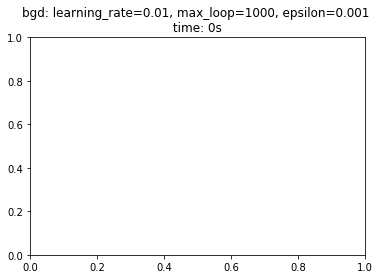

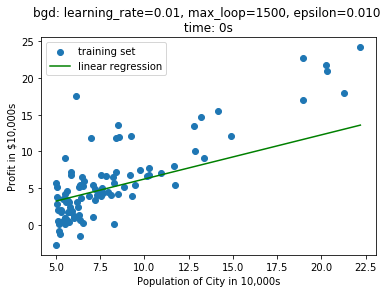

In [93]:
# 绘制拟合曲线
fitting_fig = plt.figure()
title = "bgd: learning_rate=%.2f, max_loop=%d, epsilon=%.3f \n time: %ds " %(learning_rate, max_loop, epsilon, time_consumed)
ax = fitting_fig.add_subplot(111, title=title)
training_set = ax.scatter(X[:,1].flatten().A[0], y[:,0].flatten().A[0])
x_copy = X.copy()
x_copy.sort(0)

y_hat = x_copy * theta
fitting_line, = ax.plot(x_copy[:,1], y_hat, color='g')

ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

plt.legend([training_set, fitting_line], ['training set', 'linear regression'])
plt.show()

In [94]:
#绘制误差曲线
errors_fig = plt.figure()
ax = errors_fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))

ax.plot(range(len(errors)), errors)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

plt.show()

ValueError: x and y can be no greater than 2-D, but have shapes (1000,) and (1000, 1, 1)

In [95]:
# 绘制能量下降曲面

In [96]:
# 绘制能量轮廓

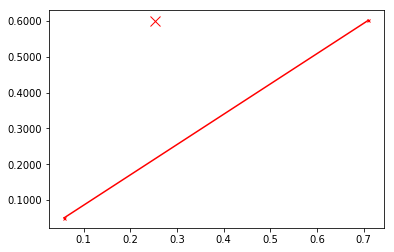

In [97]:
#绘制最优解
ax.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=2)

#绘制梯度下降过程
ax.plot(thetas[0], thetas[1], 'rx', markersize=3, linewidth=1)
ax.plot(thetas[0], thetas[1],'r-')
plt.show()